## **Data Pre-Processing**

**Import Packages and CSV**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_column", None)

In [2]:
%pwd

'/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/shipment-price/notebooks'

In [3]:
os.chdir("../")

In [4]:
df = pd.read_csv("data/dataset/train.csv")

In [5]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


## **Data Cleaning**

**Check Null Values**

In [6]:
##there are the features with nan values
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >=1]

In [7]:
features_with_na

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Material',
 'Transport',
 'Remote Location']

In [8]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 5), '% missing values')

Artist Reputation 11.53846 % missing values
Height 5.76923 % missing values
Width 8.98462 % missing values
Weight 9.03077 % missing values
Material 11.75385 % missing values
Transport 21.41538 % missing values
Remote Location 11.86154 % missing values


**what does NaN means?**

**Ans:** Missing Values in DataFrame

**Why might a value is missing?**

**Ans:** When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing.

Missing data are of three categories:

- Missing completely at random (MCAR).
- Missing at random (MAR).
- Missing not at random (MNAR).

Here it is MCAR type of missing values in dataset which are Missing completely at Random.

When we make this assumption, we are assuming the missing data is completely unrelated to the other information in the data.

### **Checking duplicated values**

In [9]:
df.duplicated().sum()

0

- There are no duplicates values in the data.

### **Seperating Features**

In [10]:
target_feature = "Cost"

# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features.remove(target_feature)
non_numerical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [11]:
target_feature = "Cost"

# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features.remove(target_feature)
non_numerical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} Non Numerical features : {}'.format(len(non_numerical_features), non_numerical_features))

We have 6 numerical features : ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']

We have 13 Non Numerical features : ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


Imputing null values with median to check the multicollinearity

In [12]:
df1 = df.copy()

for i in numerical_features:
    df1[i].fillna(df1[i].median(), inplace=True)

## **Multicollinearity Check**

**Variance Inflation Factor (VIP):**

- Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.

- Multicollinearity can be detected using various techniques, one such techniques being the Variance Inflation Factor (VIF).

In [13]:
import statsmodels.api as sm

for i in range(0, len(numerical_features)):
    x = df1.loc[:, df1.columns == numerical_features[i]]
    y = df1.Cost
    model = sm.OLS(x, y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            numerical_features[i], vif
        )
    )

Variance Inflation Factor of Artist Reputation column is 1.01 

Variance Inflation Factor of Height column is 1.01 

Variance Inflation Factor of Width column is 1.02 

Variance Inflation Factor of Weight column is 1.2 

Variance Inflation Factor of Price Of Sculpture column is 1.3 

Variance Inflation Factor of Base Shipping Price column is 1.01 



### **Note:** All the columns has VIF around 1, so there is not severe multicollinearity

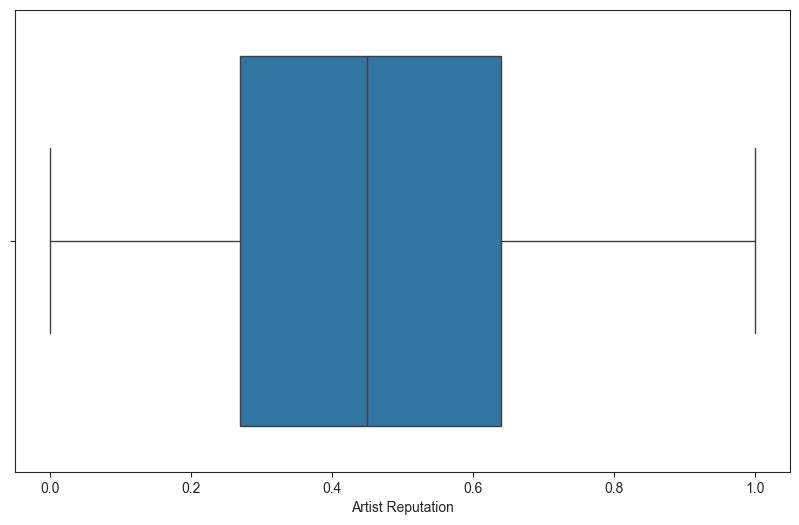

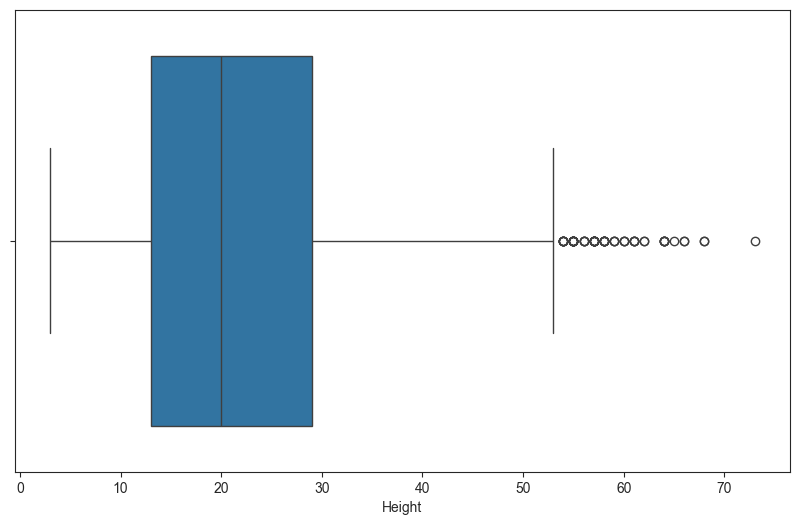

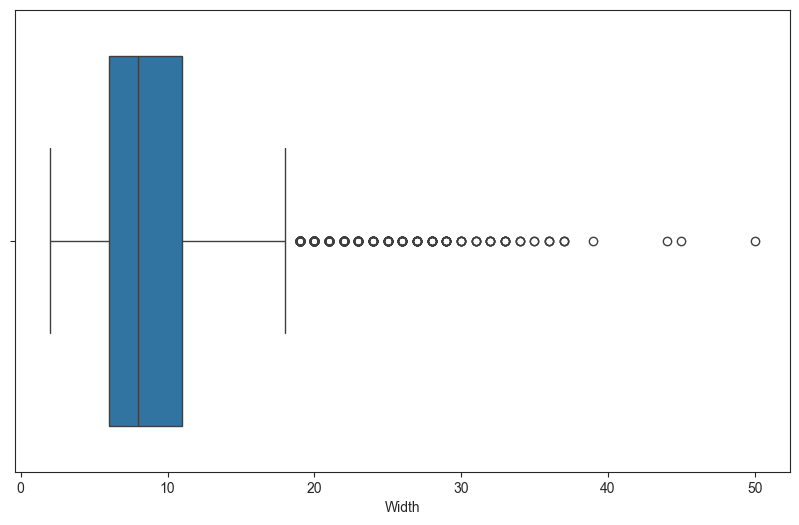

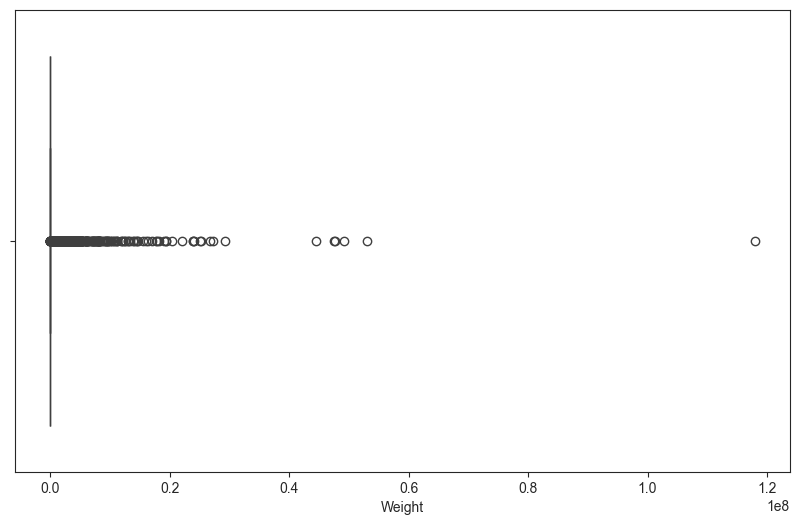

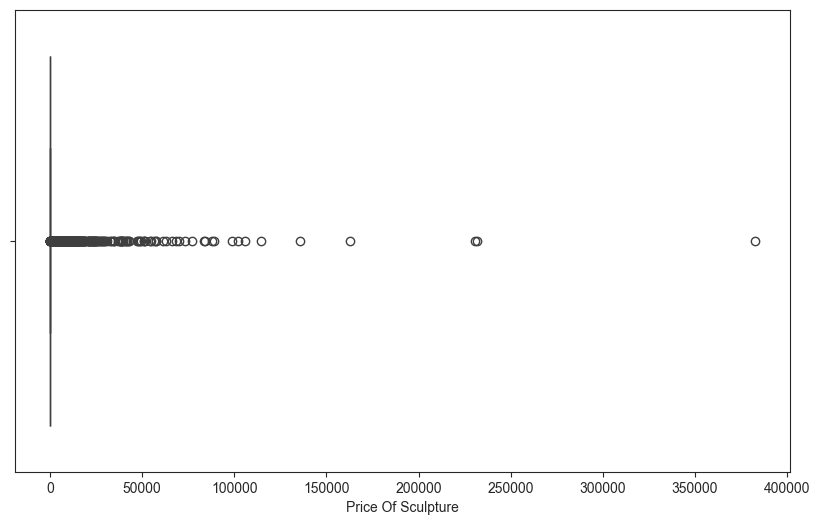

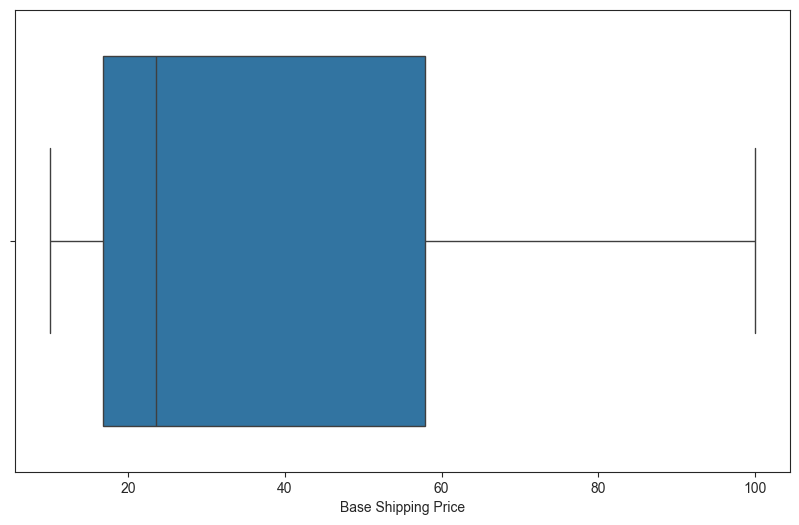

In [14]:
for i in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.set_style("ticks")
    ax = sns.boxplot(df1[i], orient="h")

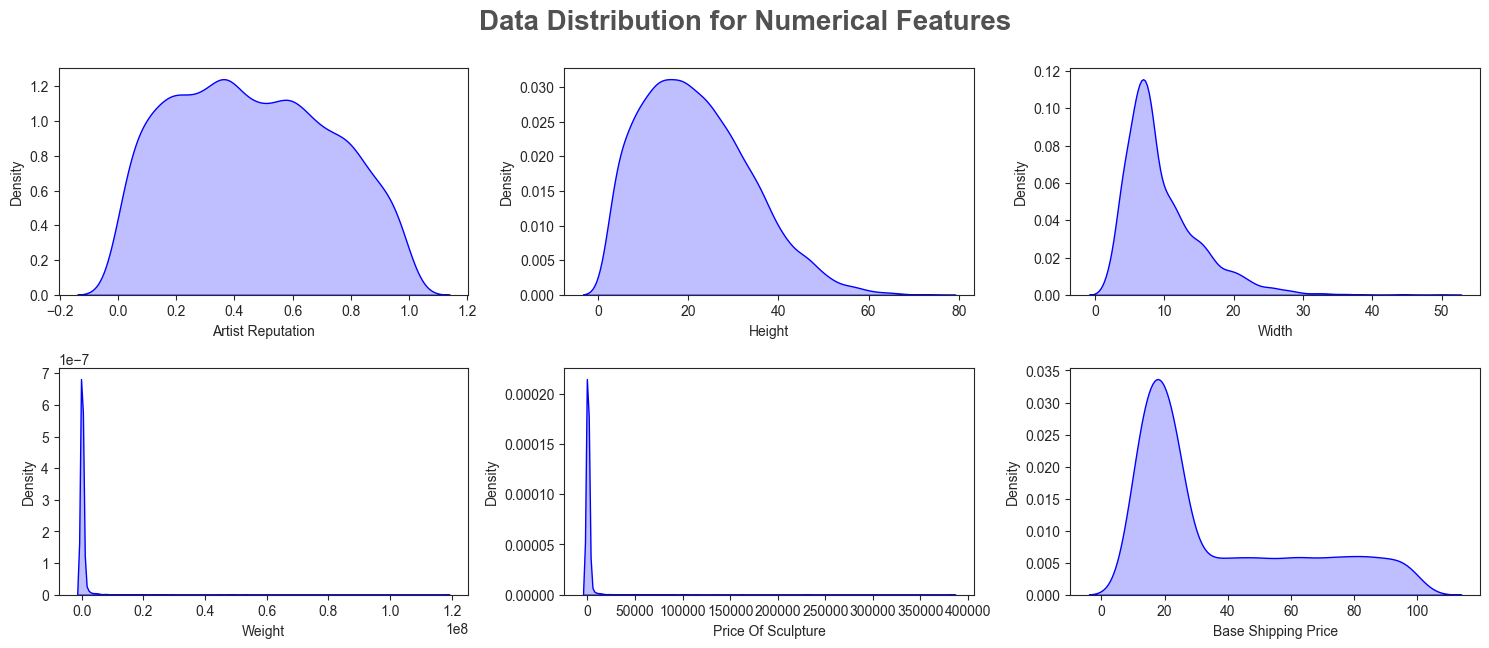

In [15]:
plt.figure(figsize=(15, 15))
plt.suptitle("Data Distribution for Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]], shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [16]:
df[numerical_features].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
dtype: float64

**Insights**

- From EDA we have ssen that the `Price of Sculpture` and `Weight` were extreamly skewed may be because outliers 
- So we can handle this type of case using Power Transformer or log transformer
- `width` and `Base Shipping Price` too are slightly positively skewed but not severe as shown by skewness coefficient.

### **Checking the power transformer on outlier columns**

In [20]:
outlier_feature = ['Price Of Sculpture', 'Weight']

In [22]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)

outlier_data = df1[outlier_feature]

In [23]:
df1[outlier_feature] = pt.fit_transform(df1[outlier_feature])

In [25]:
df_outlier = pd.DataFrame(outlier_data, columns=outlier_feature)

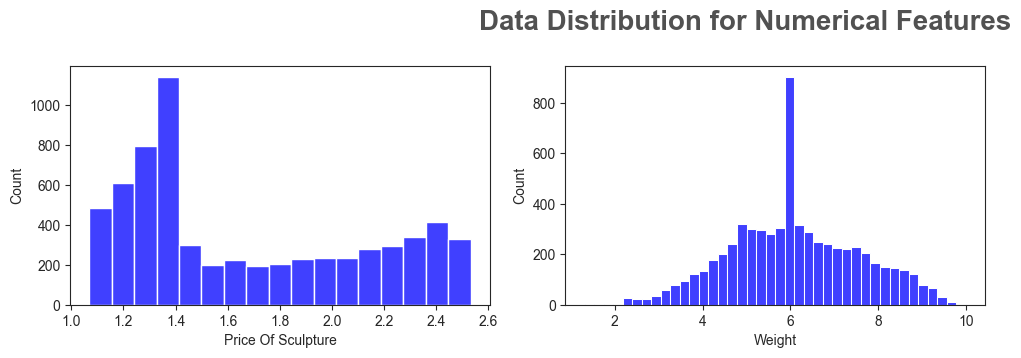

In [26]:
plt.figure(figsize=(15, 15))
plt.suptitle("Data Distribution for Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(outlier_feature)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_feature[i]], color="b")
    plt.xlabel(outlier_feature[i])
    plt.tight_layout()

In [27]:
df1[outlier_feature].skew()

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

**Insights**

- Power transformer does better job at overcoming skewness and handling outliers

**Why outliers ?**

- Data Entry error : Human error.
- Measurement error : Instrumental error.
- Natural error : It will be Real life data.
- Intentional error : People give wrong inputs.

**Impact of Outliers ?**

- Outliers can very high impact on few Machine Learning models.
- Can Cause bias in the output.

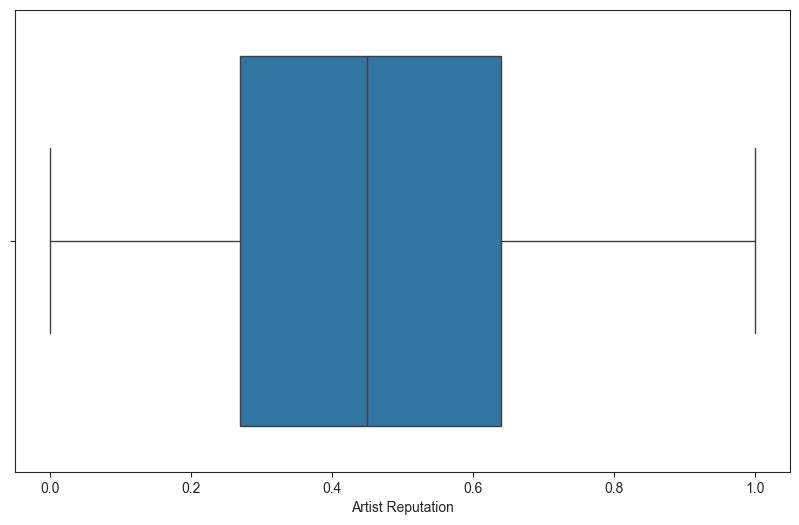

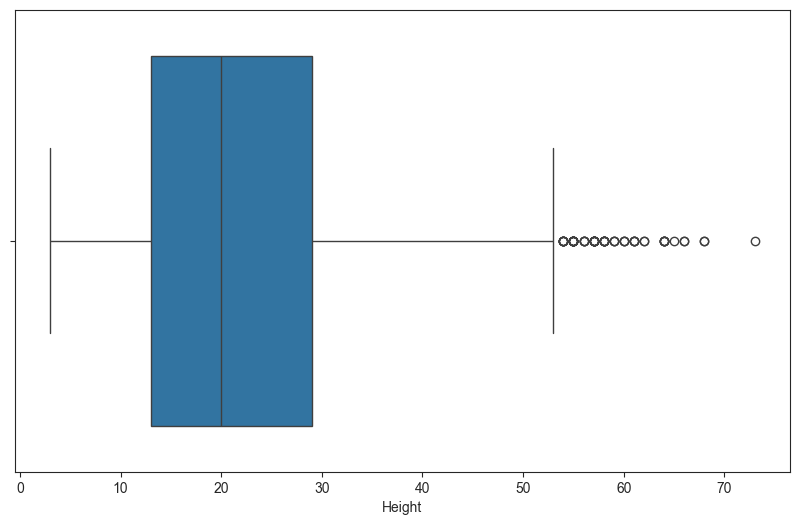

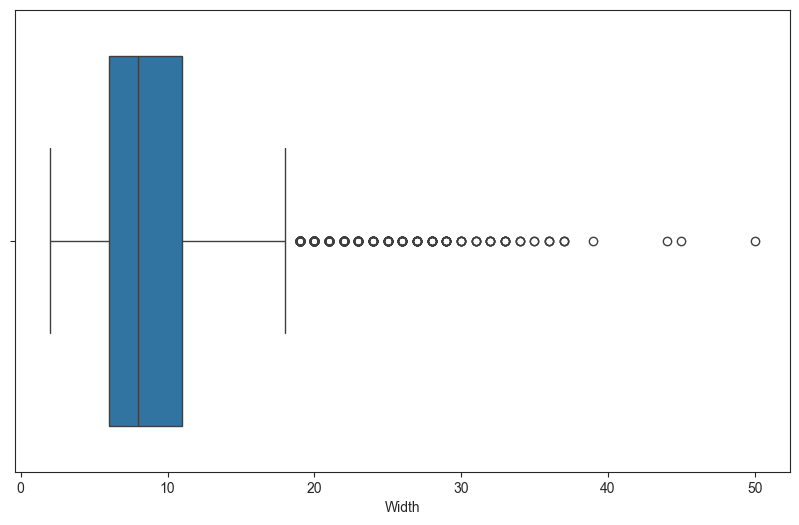

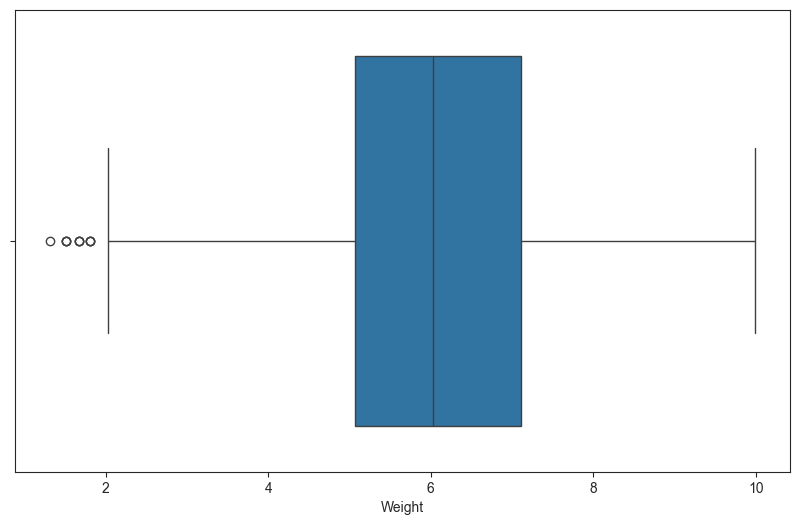

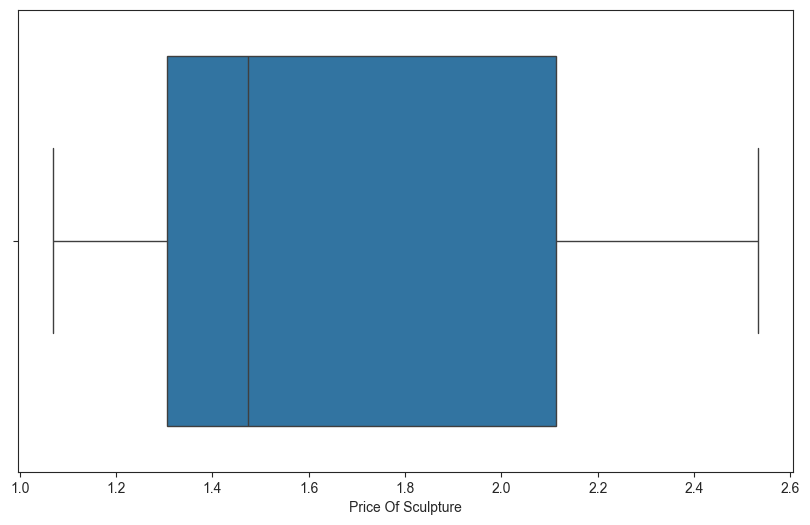

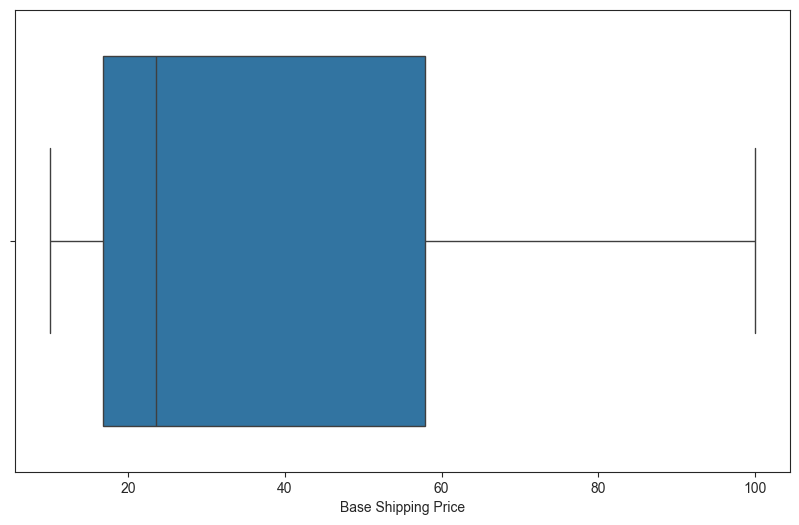

In [29]:
for i in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.set_style('ticks')
    ax = sns.boxplot(df1[i], orient='h')

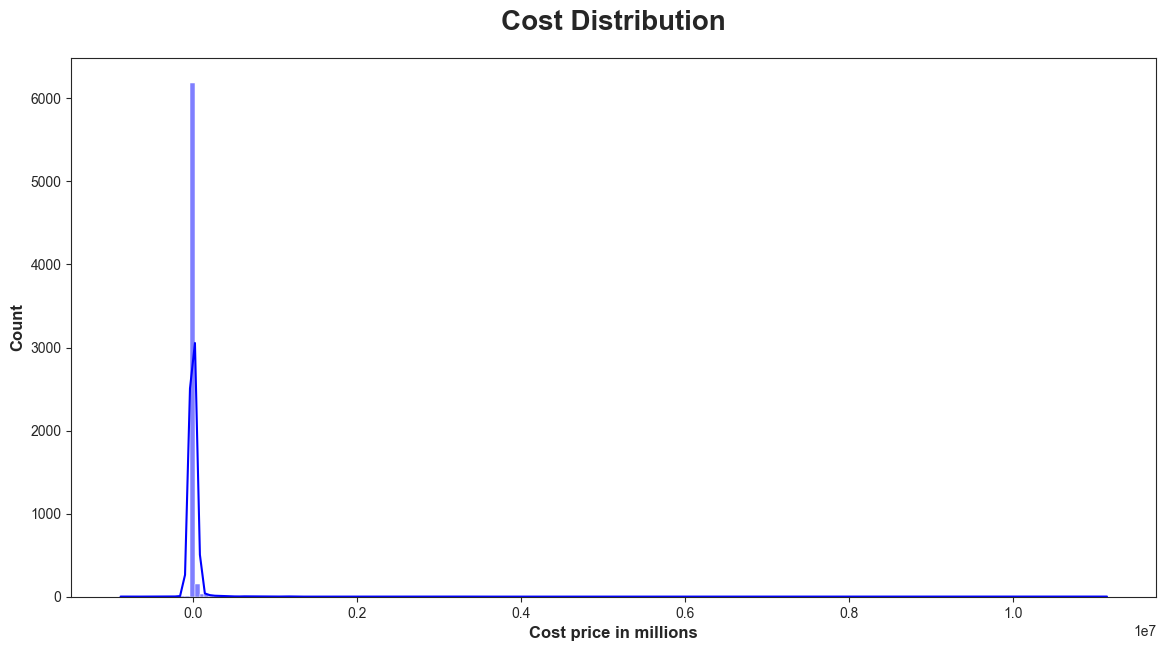

In [30]:
plt.subplots(figsize=(14, 7))
sns.histplot(df['Cost'], bins=200, kde=True, color='b')
plt.title("Cost Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.show()

Need to apply transformation to target column to make it normally distributed. we use 1p to avoid `inf` values arise dued to `0` In the target column

In [31]:
df1['Cost'] = np.log1p(df1['Cost'])

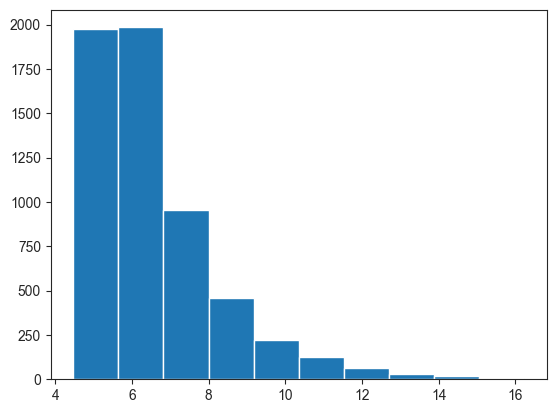

In [33]:
plt.hist(df1['Cost'])
plt.show();

Data looks good after the log transformation but not Normally distributed.

**Feature Creation for Date Columns**

In [34]:
# Convert object datatype to datetime
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [35]:
df['Month'] = pd.to_datetime(df['Scheduled Date']).dt.month
df['Year'] = pd.to_datetime(df['Scheduled Date']).dt.year 

numerical_features.append('Month')
numerical_features.append('Year')

### **Drop Unnecessary column**

Drop `Customer Id`, `Artist Name` and `Customer Location` columns having huge number of unique values.

`Scheduled Date` and `Delivery Date` can be dropped since the required features and extracted from it

In [36]:
to_drop_columns = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']

In [37]:
df[to_drop_columns]

,Customer Id,Artist Name,Customer Location,Scheduled Date,Delivery Date
0,fffe3900350033003300,Billy Jenkins,"New Michelle, OH 50777",2015-06-07,2015-06-03
1,fffe3800330031003900,Jean Bryant,"New Michaelport, WY 12072",2017-03-06,2017-03-05
2,fffe3600370035003100,Laura Miller,"Bowmanshire, WA 19241",2015-03-09,2015-03-08
3,fffe350031003300,Robert Chaires,"East Robyn, KY 86375",2015-05-24,2015-05-20
4,fffe3900320038003400,Rosalyn Krol,"Aprilside, PA 52793",2016-12-18,2016-12-14
...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,"New Robert, VT 85335",2018-03-28,2018-03-25
6496,fffe310036003400,Larry Edwards,"New Joshua, VA 35766",2015-08-29,2015-08-27
6497,fffe3600300031003300,Denise Worth,"Lake Kelly, MA 80823",2019-04-10,2019-04-09
6498,fffe3600350035003900,Daniel Drew,"Hintonberg, UT 35006",2019-03-10,2019-03-12


In [38]:
df.drop(columns=to_drop_columns, inplace=True)

### **Model Building**

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

### **Split X and y**

In [41]:
x = df.drop(columns = ['Cost'], axis=1)
y = np.abs(df['Cost'])

In [42]:
y = np.log1p(y)

### **Train Test Split**

- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Feature Encoding and Scaling**

**Selecting Numerical and Categorical features for feature scaling**

In [44]:
numerical_features = [x for x in numerical_features if x not in outlier_feature]
Categorical_features = [x for x in non_numerical_features if x not in to_drop_columns]

(numerical_features), (Categorical_features), (outlier_feature)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'Month',
  'Year'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Price Of Sculpture', 'Weight'])

- **Mean Imputer:** Since we handled outlier by powertransformer for the continuous features the mean and median of the nearly same. When there are no outliers mean perform an a better imputer.

- **StandardScaler:** As the features distribution are nearly normal we use standard scaler.

- **Power Transformer:** Since avg_glucose_level are skewed we use Power Transformer on them.

In [45]:
numerical_features_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', RobustScaler())
    ]
)

categorical_features_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ]
)

outliers_features_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('transformer', PowerTransformer(standardize=True))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('Numeric Pipeline', numerical_features_pipeline, numerical_features),
        ('Categorical Features Pipeline', categorical_features_pipeline, Categorical_features),
        ('Outlier Features Pipeline', outliers_features_pipeline, outlier_feature)
    ]
)

In [47]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### **Model Selection**

- **Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and processed with HyperParameter Tunning**

In [48]:
# function which takes ture and predicted values to calculate metrics
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_Square = r2_score(true, predicted)
    return mae, mse, rmse, r2_Square

In [58]:
# function which can evaluate models and return a report
def evaluate_models(X_train, X_test, y_train, y_test, models):
    ''' 
    This function takes in X and y and models dictionary as input
    it splits the data into train test split
    iterates through the given model directory and evaluates the metrics
    Returns: Datframe which contains report of all model metrics with cost
    '''

    models_list = []
    r2_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
        model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_reg(y_train, y_train_pred)

        model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_reg(y_test, y_test_pred)

        print(list(models.keys())[i])

        models_list.append(list(models.keys())[i])

        print('Model Performance for Training Set')
        print(" - Root Mean Squared Error : {:.4f}".format(model_train_rmse))
        print(" - Mean Absolute Error : {:.4f}".format(model_train_mae))
        print(" - R2 Score : {:.4f}".format(model_train_r2))

        print('-----------------------------------')

        print('Model Performance for Test Set')
        print(" - Root Mean Squared Error : {:.4f}".format(model_test_rmse))
        print(" - Mean Absolute Error : {:.4f}".format(model_test_mae))
        print(" - R2 Score : {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('-'*35)
        print('\n')

    report = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score']).sort_values(by=['r2_score'], ascending=False)

    return report 
        

In [59]:
# Initialize the required models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNeighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0, max_depth=5),
    'SVR': SVR()
}

In [60]:
base_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Linear Regression
Model Performance for Training Set
 - Root Mean Squared Error : 0.7995
 - Mean Absolute Error : 0.5738
 - R2 Score : 0.7655
-----------------------------------
Model Performance for Test Set
 - Root Mean Squared Error : 0.7609
 - Mean Absolute Error : 0.5649
 - R2 Score : 0.7874
-----------------------------------


Ridge
Model Performance for Training Set
 - Root Mean Squared Error : 0.7357
 - Mean Absolute Error : 0.4970
 - R2 Score : 0.8014
-----------------------------------
Model Performance for Test Set
 - Root Mean Squared Error : 0.6965
 - Mean Absolute Error : 0.4840
 - R2 Score : 0.8218
-----------------------------------


Lasso
Model Performance for Training Set
 - Root Mean Squared Error : 1.3807
 - Mean Absolute Error : 0.9717
 - R2 Score : 0.3006
-----------------------------------
Model Performance for Test Set
 - Root Mean Squared Error : 1.3753
 - Mean Absolute Error : 0.9873
 - R2 Score : 0.3052
-----------------------------------


KNeighbors
Model

In [61]:
base_report

,Model Name,r2_score
8,CatBoost,0.971792
7,XGBoost,0.963607
5,Random Forest,0.954402
9,SVR,0.913033
4,Decision Tree,0.894103
6,AdaBoost,0.849407
3,KNeighbors,0.840555
1,Ridge,0.821791
0,Linear Regression,0.787352
2,Lasso,0.305173


## **Best Model is CATBoost Regressor with 97.17% Score**